# Hacker News Project

### We'll compare these two types of posts to determine the following:

* Do `Ask HN` or `Show HN` receive more comments on average?
* Do posts created at a certain time receive more comments on average?


### Table Headers :

0. _id_ : post unique identifier from Hacker News
1. _title_ : title of the post
2. _url_ : URL of the post
3. _num-points_ : number of points, upvotes minus downvotes
4. _num-comments_ : The number of comments on the post
5. _author_ : The username who submitted the post
6. _created-at_ : The date and time the post was submitted

In [1]:
import csv
import datetime as dt

In [2]:
with open('hacker_news.csv') as f:
    hn_data = list(csv.reader(f))
    
headers = hn_data.pop(0)
print(headers)
print(hn_data[0:2])
print(len(hn_data))

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
[['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']]
20100


In [3]:
ask_posts  = [i for i in hn_data if i[1].lower().startswith('ask hn')]
show_posts = [i for i in hn_data if i[1].lower().startswith('show hn')]
othr_posts = [i for i in hn_data if not i[1].lower().startswith('show hn') and not i[1].lower().startswith('ask hn')]

print(len(ask_posts ))
print(len(show_posts))
print(len(othr_posts))
print(len(ask_posts)+len(show_posts)+len(othr_posts))

1744
1162
17194
20100


In [4]:
total_ask_comments = sum([int(i[4]) for i in ask_posts])
averg_ask_comments = total_ask_comments / len(ask_posts)

total_show_comments = sum([int(i[4]) for i in show_posts])
averg_show_comments = total_show_comments / len(show_posts)

total_othr_comments = sum([int(i[4]) for i in othr_posts])
averg_othr_comments = total_othr_comments / len(othr_posts)

print(total_ask_comments)
print(averg_ask_comments)

print(total_show_comments)
print(averg_show_comments)

print(total_othr_comments)
print(averg_othr_comments)


24483
14.038417431192661
11988
10.31669535283993
462055
26.8730371059672


From the numbers above, we can see that ask and show posts recieve ***less*** comments. than other posts,

and ask posts recieve ***more*** comments than show posts

## determine if ask posts created at a certain time are more likely to attract comments


* Calculate the amount of ask posts created in each hour of the day, along with the number of comments received.
* Calculate the average number of comments ask posts receive by hour created.


In [5]:
print(headers)
print(ask_posts[0])

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55']


In [6]:
for i in ask_posts:
    i[6] = dt.datetime.strptime(i[6],'%m/%d/%Y %H:%M')

In [7]:
# creating empty dic with day hours as keys

posts_per_hour = {i:[] for i in range(24)}

print(posts_per_hour)
print(len(posts_per_hour))

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: []}
24


In [8]:
for post in ask_posts:
    posts_per_hour[post[6].hour].append(post)

In [9]:
print(len(posts_per_hour[0]))
print(len(posts_per_hour))

55
24


In [10]:
count_posts_per_hour = {i:[] for i in range(24)}
tot_comment_per_hour = {i:[] for i in range(24)}

for hour,posts in posts_per_hour.items():
    
    count_posts_per_hour[hour] = len(posts)
    
    tot_comment_per_hour[hour] = sum([int(post[4]) for post in posts])


print('Amount of posts for each hour:')
for i in count_posts_per_hour: print(i, ' >>> ', count_posts_per_hour[i])

print('\nTotal comments for each hour:')
for i in tot_comment_per_hour:print(i, ' >>> ', tot_comment_per_hour[i])

print('\nAvg number of comments ask posts receive by hour created:')
for i in tot_comment_per_hour:print('{:02d} >>> {:.2f}'.format(i, tot_comment_per_hour[i]/count_posts_per_hour[i]))

Amount of posts for each hour:
0  >>>  55
1  >>>  60
2  >>>  58
3  >>>  54
4  >>>  47
5  >>>  46
6  >>>  44
7  >>>  34
8  >>>  48
9  >>>  45
10  >>>  59
11  >>>  58
12  >>>  73
13  >>>  85
14  >>>  107
15  >>>  116
16  >>>  108
17  >>>  100
18  >>>  109
19  >>>  110
20  >>>  80
21  >>>  109
22  >>>  71
23  >>>  68

Total comments for each hour:
0  >>>  447
1  >>>  683
2  >>>  1381
3  >>>  421
4  >>>  337
5  >>>  464
6  >>>  397
7  >>>  267
8  >>>  492
9  >>>  251
10  >>>  793
11  >>>  641
12  >>>  687
13  >>>  1253
14  >>>  1416
15  >>>  4477
16  >>>  1814
17  >>>  1146
18  >>>  1439
19  >>>  1188
20  >>>  1722
21  >>>  1745
22  >>>  479
23  >>>  543

Avg number of comments ask posts receive by hour created:
00 >>> 8.13
01 >>> 11.38
02 >>> 23.81
03 >>> 7.80
04 >>> 7.17
05 >>> 10.09
06 >>> 9.02
07 >>> 7.85
08 >>> 10.25
09 >>> 5.58
10 >>> 13.44
11 >>> 11.05
12 >>> 9.41
13 >>> 14.74
14 >>> 13.23
15 >>> 38.59
16 >>> 16.80
17 >>> 11.46
18 >>> 13.20
19 >>> 10.80
20 >>> 21.52
21 >>> 16.01
22 

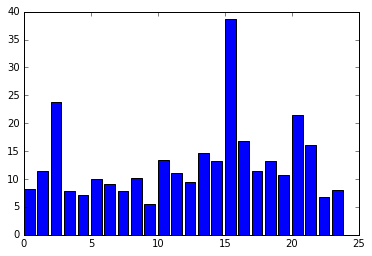

In [11]:
%matplotlib inline  
import matplotlib.pyplot as plt


avg_by_hour = {}
for i in tot_comment_per_hour:
    avg_by_hour[i] = tot_comment_per_hour[i]/count_posts_per_hour[i]


pl = plt.bar(avg_by_hour, avg_by_hour.values())

In [12]:
lol = sorted(
               [  [v, k] for k,v in avg_by_hour.items()  ],
    
               reverse = True
            )

In [13]:
print("Top 5 Hours for Ask Posts Comments:")
[i[1] for i in lol[:5]]

Top 5 Hours for Ask Posts Comments:


[15, 2, 20, 16, 21]

In [14]:
for i in lol:
    print(
        dt.datetime(2020,1,1,i[1]).strftime('%H:%M') +
        '  :  {:.2f} average comments per post'.format(i[0])
    )

15:00  :  38.59 average comments per post
02:00  :  23.81 average comments per post
20:00  :  21.52 average comments per post
16:00  :  16.80 average comments per post
21:00  :  16.01 average comments per post
13:00  :  14.74 average comments per post
10:00  :  13.44 average comments per post
14:00  :  13.23 average comments per post
18:00  :  13.20 average comments per post
17:00  :  11.46 average comments per post
01:00  :  11.38 average comments per post
11:00  :  11.05 average comments per post
19:00  :  10.80 average comments per post
08:00  :  10.25 average comments per post
05:00  :  10.09 average comments per post
12:00  :  9.41 average comments per post
06:00  :  9.02 average comments per post
00:00  :  8.13 average comments per post
23:00  :  7.99 average comments per post
07:00  :  7.85 average comments per post
03:00  :  7.80 average comments per post
04:00  :  7.17 average comments per post
22:00  :  6.75 average comments per post
09:00  :  5.58 average comments per post


### It can be clearly seen that posting at 3:00 pm is the best shot :)